In [4]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
nodes = pd.read_csv("InputFileNodes.csv")
edges = pd.read_csv("InputFileEdges.csv")

In [6]:
edges_clean = edges.groupby(["from", "to"]).agg({"weight": "sum"}).reset_index()

In [7]:
G = nx.Graph()
G.add_nodes_from(nodes["id"])
for _, row in edges_clean.iterrows():
    G.add_edge(row["from"], row["to"], weight=row["weight"])

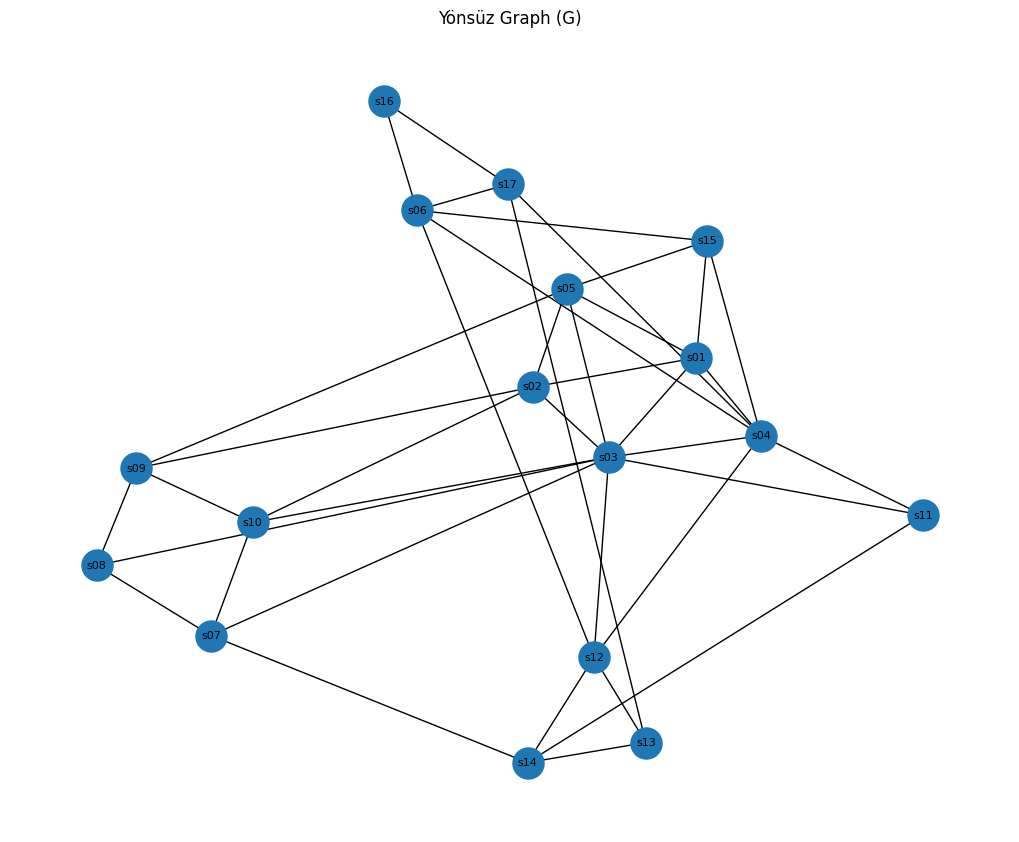

In [8]:
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=500, font_size=8)
plt.title("Yönsüz Graph (G)")
plt.show()

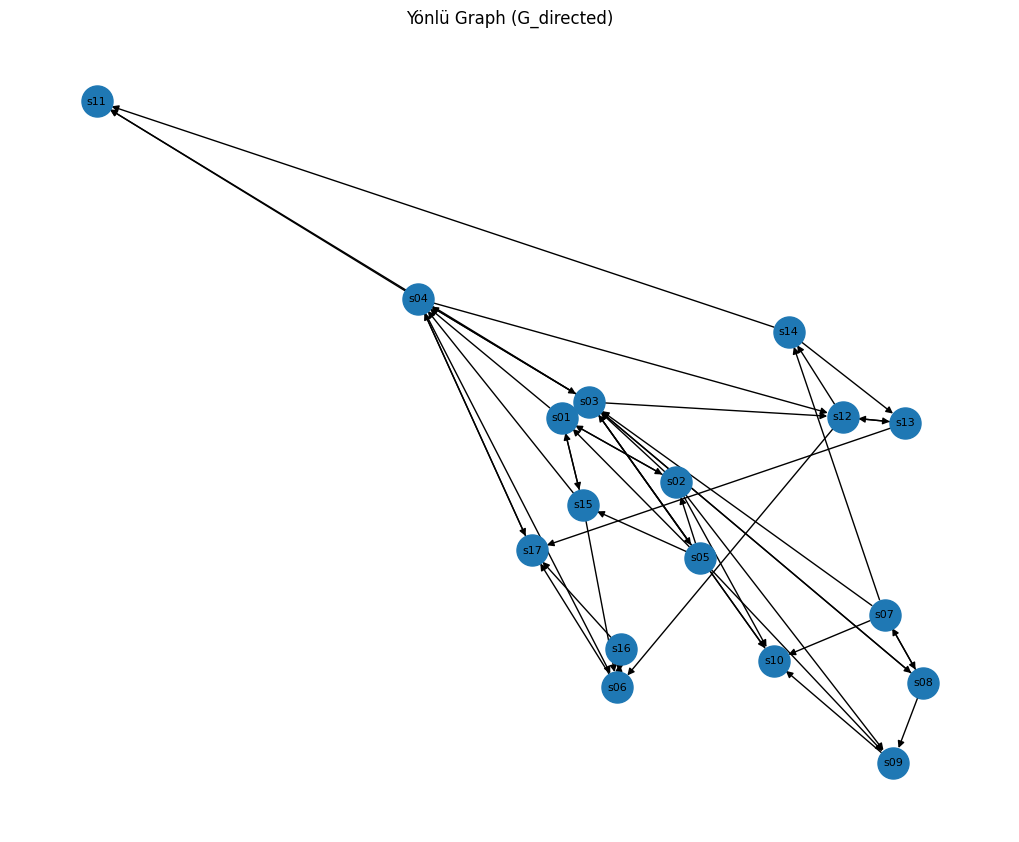

In [9]:
G_directed = nx.DiGraph()
G_directed.add_nodes_from(nodes["id"])
for _, row in edges_clean.iterrows():
    G_directed.add_edge(row["from"], row["to"], weight=row["weight"])
plt.figure(figsize=(10, 8))
nx.draw(G_directed, with_labels=True, node_size=500, font_size=8)
plt.title("Yönlü Graph (G_directed)")
plt.show()

In [10]:
#düğümlerin dereceleri
degree_list = dict(G.degree())
print("\n--- Düğümlerin Dereceleri ---")
print(degree_list)


--- Düğümlerin Dereceleri ---
{'s01': 5, 's02': 5, 's03': 9, 's04': 7, 's05': 5, 's06': 5, 's07': 4, 's08': 3, 's09': 4, 's10': 4, 's11': 3, 's12': 5, 's13': 3, 's14': 4, 's15': 4, 's16': 2, 's17': 4}


In [11]:
#ort derece
avg_degree = sum(dict(G.degree()).values()) / G.number_of_nodes()
print("\nOrtalama Derece:", avg_degree)


Ortalama Derece: 4.470588235294118


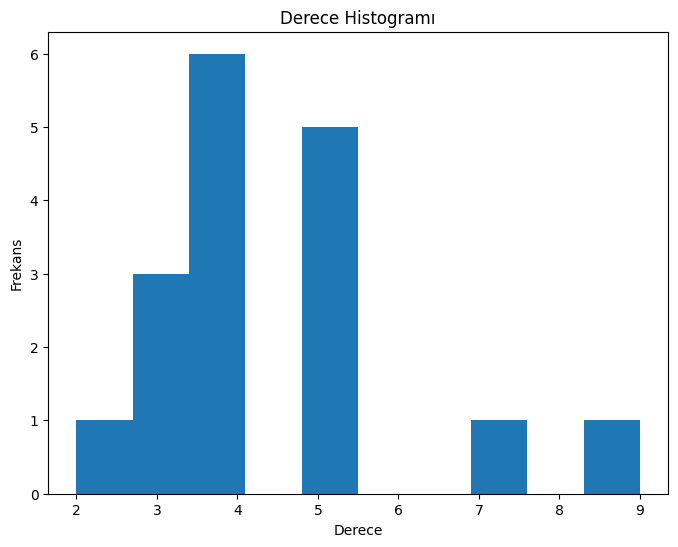

In [12]:
#derece histogramı
plt.figure(figsize=(8, 6))
plt.hist(list(dict(G.degree()).values()))
plt.title("Derece Histogramı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()

In [13]:
#degree centrality
degree_centrality = nx.degree_centrality(G)
print("\n--- Degree Centrality ---")
print(degree_centrality)


--- Degree Centrality ---
{'s01': 0.3125, 's02': 0.3125, 's03': 0.5625, 's04': 0.4375, 's05': 0.3125, 's06': 0.3125, 's07': 0.25, 's08': 0.1875, 's09': 0.25, 's10': 0.25, 's11': 0.1875, 's12': 0.3125, 's13': 0.1875, 's14': 0.25, 's15': 0.25, 's16': 0.125, 's17': 0.25}


In [14]:
closeness = nx.closeness_centrality(G)
print("\n--- Closeness Centrality ---")
print(closeness)


--- Closeness Centrality ---
{'s01': 0.5333333333333333, 's02': 0.48484848484848486, 's03': 0.6666666666666666, 's04': 0.6153846153846154, 's05': 0.5161290322580645, 's06': 0.5, 's07': 0.48484848484848486, 's08': 0.45714285714285713, 's09': 0.41025641025641024, 's10': 0.47058823529411764, 's11': 0.5161290322580645, 's12': 0.5714285714285714, 's13': 0.43243243243243246, 's14': 0.47058823529411764, 's15': 0.48484848484848486, 's16': 0.35555555555555557, 's17': 0.45714285714285713}


In [15]:
betweenness = nx.betweenness_centrality(G)
print("\n--- Betweenness Centrality ---")
print(betweenness)


--- Betweenness Centrality ---
{'s01': 0.039146825396825395, 's02': 0.025992063492063486, 's03': 0.3404166666666666, 's04': 0.19566468253968256, 's05': 0.0654563492063492, 's06': 0.10018849206349206, 's07': 0.050277777777777775, 's08': 0.019593253968253968, 's09': 0.017361111111111112, 's10': 0.025843253968253963, 's11': 0.017916666666666664, 's12': 0.12271825396825398, 's13': 0.02111111111111111, 's14': 0.049166666666666664, 's15': 0.05621031746031746, 's16': 0.0, 's17': 0.05293650793650794}


In [16]:
eigenvector = nx.eigenvector_centrality(G)
print("\n--- Eigenvector Centrality ---")
print(eigenvector)


--- Eigenvector Centrality ---
{'s01': 0.31914086837291605, 's02': 0.2910340882293078, 's03': 0.4485472979675353, 's04': 0.3528334611736863, 's05': 0.2925525270528745, 's06': 0.20688820586442142, 's07': 0.1936188619934287, 's08': 0.1646295034122241, 's09': 0.1915922923064456, 's10': 0.22209545169996198, 's11': 0.1869275012952371, 's12': 0.248809538829334, 's13': 0.1065065446362404, 's14': 0.14530038460965825, 's15': 0.23130251528184956, 's16': 0.06953859174549203, 's17': 0.14528213666865794}


In [17]:
katz = nx.katz_centrality(G, alpha=0.005, beta=1.0)
print("\n--- Katz Centrality ---")
print(katz)


--- Katz Centrality ---
{'s01': 0.2432015221760365, 's02': 0.24318328374219464, 's03': 0.24801079673384518, 's04': 0.245602921892508, 's05': 0.24318328507583595, 's06': 0.2431528507886903, 's07': 0.2419550559716571, 's08': 0.2407513000743874, 's09': 0.24193720992472154, 's10': 0.24196721596482826, 's11': 0.24076947804982377, 's12': 0.24318887688561536, 's13': 0.24072703847189753, 's14': 0.24192498710222704, 's15': 0.24196748699037643, 's16': 0.23951723377043033, 's17': 0.24193678508587702}


In [18]:
pagerank = nx.pagerank(G)
print("\n--- PageRank ---")
print(pagerank)


--- PageRank ---
{'s01': 0.08510275171090052, 's02': 0.07036723548249191, 's03': 0.07210878220106508, 's04': 0.07793068159840724, 's05': 0.04910224124242257, 's06': 0.06038211879945627, 's07': 0.0558770073826599, 's08': 0.05483671362647849, 's09': 0.05556519842984654, 's10': 0.05703894111148803, 's11': 0.030132480983098626, 's12': 0.0592909216542193, 's13': 0.053256815369730585, 's14': 0.05866910324143483, 's15': 0.05086993441701705, 's16': 0.05330205121583223, 's17': 0.05616702153345073}


In [19]:
#Modularity
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)

In [20]:
from networkx.algorithms.community import modularity
mod_value = modularity(G, communities)

print("\nModularity:", mod_value)


Modularity: 0.33728027343750006


In [21]:
density = nx.density(G)
print("\nDensity:", density)


Density: 0.27941176470588236


In [22]:
avg_clust = nx.average_clustering(G)
print("\nAverage Clustering:", avg_clust)


Average Clustering: 0.4205882352941176


In [23]:
#Diameter (Graf bağlı ise)
if nx.is_connected(G):
    diameter = nx.diameter(G)
else:
    diameter = "Graf bağlı değil"
print("\nDiameter:", diameter)


Diameter: 4


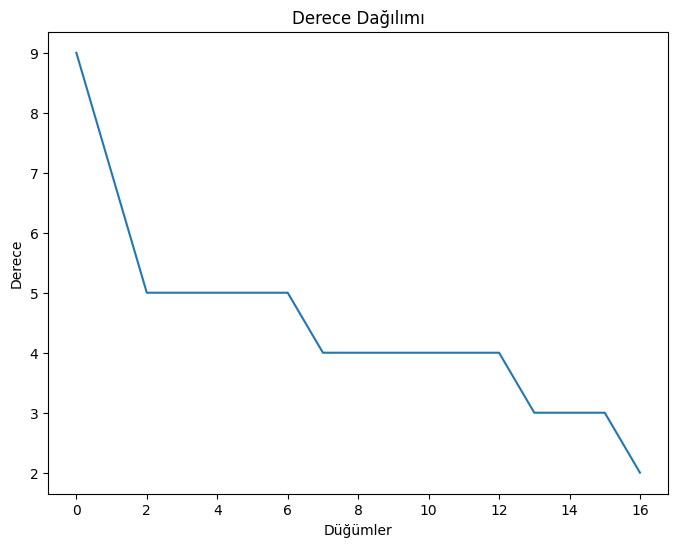

In [24]:
# Derece dağılımı
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

plt.figure(figsize=(8, 6))
plt.plot(degree_sequence)
plt.title("Derece Dağılımı")
plt.xlabel("Düğümler")
plt.ylabel("Derece")
plt.show()

In [25]:
#En kritik 5 köprü düğümünü bulma
betweenness = nx.betweenness_centrality(G)

# Betweenness değerlerine göre sıralama
top5_bridge_nodes = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]

print("\nEn Kritik 5 Köprü Düğümü (Betweenness Centrality)")
for node, value in top5_bridge_nodes:
    print(f"Düğüm: {node}  |  Betweenness: {value}")



En Kritik 5 Köprü Düğümü (Betweenness Centrality)
Düğüm: s03  |  Betweenness: 0.3404166666666666
Düğüm: s04  |  Betweenness: 0.19566468253968256
Düğüm: s12  |  Betweenness: 0.12271825396825398
Düğüm: s06  |  Betweenness: 0.10018849206349206
Düğüm: s05  |  Betweenness: 0.0654563492063492


In [26]:
#En kritik 5 lider düğüm (Eigenvector Centrality)
eigen = nx.eigenvector_centrality(G)

top5_leader_nodes = sorted(eigen.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n--- En Kritik 5 Lider Düğüm (Eigenvector Centrality) ---")
for node, value in top5_leader_nodes:
    print(f"Düğüm: {node}  |  Eigenvector Centrality: {value}")


--- En Kritik 5 Lider Düğüm (Eigenvector Centrality) ---
Düğüm: s03  |  Eigenvector Centrality: 0.4485472979675353
Düğüm: s04  |  Eigenvector Centrality: 0.3528334611736863
Düğüm: s01  |  Eigenvector Centrality: 0.31914086837291605
Düğüm: s05  |  Eigenvector Centrality: 0.2925525270528745
Düğüm: s02  |  Eigenvector Centrality: 0.2910340882293078


Toplam Dereceler: [8, 6, 13, 9, 5, 6, 5, 5, 4, 5, 3, 6, 4, 4, 5, 3, 5]


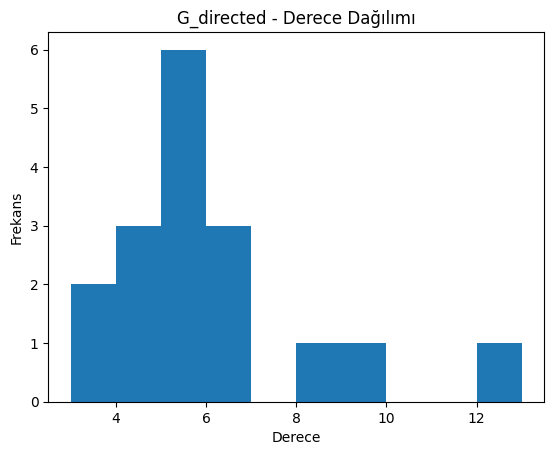

In [27]:
# Her düğüm için toplam derece (in + out)
total_degree = [deg_in + deg_out for (node, deg_in), (_, deg_out)
                in zip(G_directed.in_degree(), G_directed.out_degree())]

print("Toplam Dereceler:", total_degree)

# Histogram çizimi
plt.hist(total_degree, bins=10)
plt.title("G_directed - Derece Dağılımı")
plt.xlabel("Derece")
plt.ylabel("Frekans")
plt.show()

Ağdan kaldırılacak en güçlü 3 düğüm: ['s03', 's04', 's01']


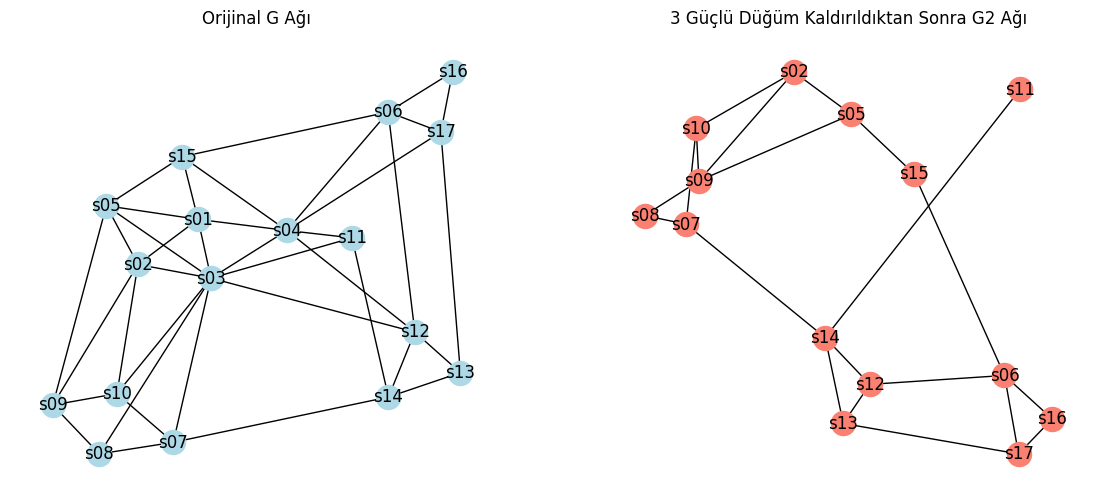

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

# 1) Degree centrality hesapla
degree_centrality = nx.degree_centrality(G)

# 2) En güçlü 3 düğümü sırala
top3_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
strong_nodes = [node for node, value in top3_nodes]

print("Ağdan kaldırılacak en güçlü 3 düğüm:", strong_nodes)

# 3) Yeni ağ oluştur (G2)
G2 = G.copy()
G2.remove_nodes_from(strong_nodes)

# 4) Orijinal ağ ve yeni ağ çizimi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
nx.draw(G, with_labels=True, node_color="lightblue")
plt.title("Orijinal G Ağı")

plt.subplot(1, 2, 2)
nx.draw(G2, with_labels=True, node_color="salmon")
plt.title("3 Güçlü Düğüm Kaldırıldıktan Sonra G2 Ağı")

plt.show()